<a href="https://colab.research.google.com/github/1901277jaehyeok/1901277jaehyeok/blob/main/2%EC%9E%A5_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(1)

In [2]:
X = np.array([[-20, 10], [-10, 7], [5, 6], [20, 4], [35, 1]])
X

array([[-20,  10],
       [-10,   7],
       [  5,   6],
       [ 20,   4],
       [ 35,   1]])

(-30.0, 40.0)

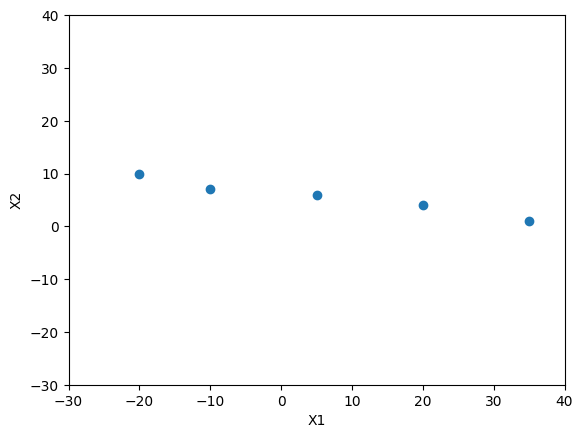

In [7]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-30, 40)
plt.ylim(-30, 40)

In [8]:
# 열별 평균 
print(np.mean(X, axis=0))
# 열별 분산
print(np.var(X, axis=0))

[6.  5.6]
[394.     9.04]


In [9]:
# 데이터 표준화
ScalerX = StandardScaler()
ScalerX.fit(X)
X_std = ScalerX.transform(X)
# 데이터프레임으로 변환 및 열이름 설정
print(X_std)

[[-1.30986108  1.46341823]
 [-0.80606835  0.46563307]
 [-0.05037927  0.13303802]
 [ 0.70530981 -0.53215208]
 [ 1.46099889 -1.52993724]]


(1) 정답

(-3.0, 3.0)

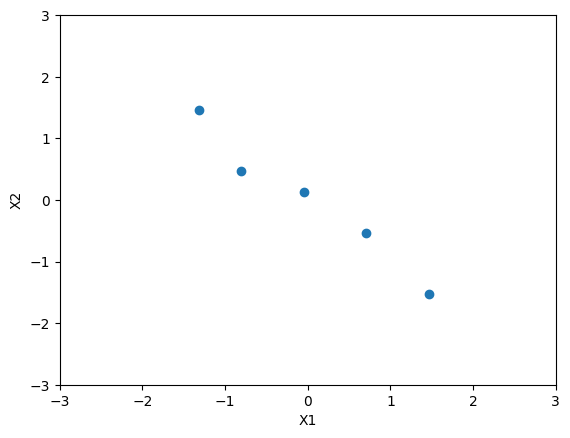

In [10]:
# 표준화된 데이터의 1열(X1)과 2열(X2)의 산포도 
plt.scatter(X_std[:,0], X_std[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

(2)

In [11]:
# 열별 평균 
print(np.mean(X_std, axis=0))
# 모공분산행렬
print(np.cov(X_std[:,0], X_std[:,1], ddof = 0))

[-4.4408921e-17  8.8817842e-17]
[[ 1.         -0.98189555]
 [-0.98189555  1.        ]]


In [12]:
# 주성분의 수 설정
pca = PCA(n_components=2) 
# 주성분분석
pca.fit(X_std)

PCA(n_components=2)

(5) 주성분의 분산비율

In [13]:
# 주성분 분산 
print(pca.explained_variance_)
# 주성분 분산비율 
print(pca.explained_variance_ratio_)

[2.47736943 0.02263057]
[0.99094777 0.00905223]


In [14]:
# 주성분으로 데이터 변환
Z = pca.fit_transform(X_std)
Z

array([[-1.96100461, -0.10858131],
       [-0.8992287 ,  0.2407241 ],
       [-0.12969561, -0.05844856],
       [ 0.8750177 , -0.122441  ],
       [ 2.11491122,  0.04874677]])

In [ ]:
(4)

(-2.5, 2.5)

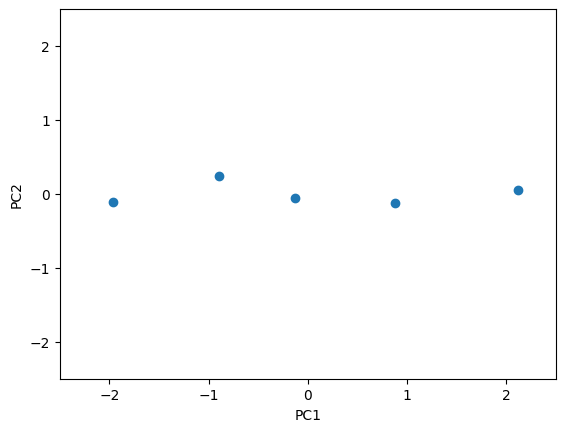

In [15]:
# 주성분 좌표계의 분포
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

In [16]:
# 주성분 로딩(고유벡터) 
loadings = pca.components_
print(loadings)

[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


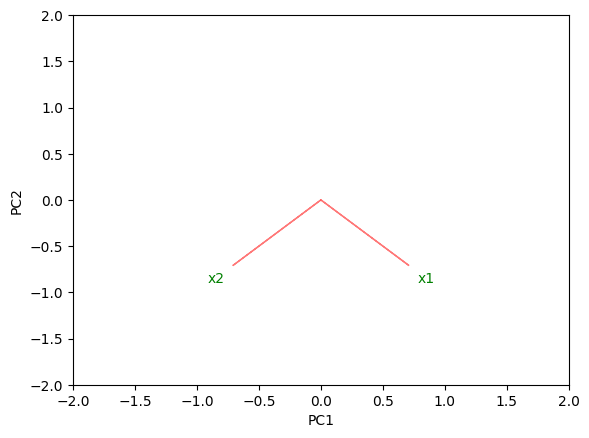

In [18]:
# 주성분 로딩 분포
plt.scatter(loadings[:,0], loadings[:,1], color='w')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
# 행과 열의 수 
rows, columns = loadings.shape
# 행의 이름 
rows_names = ['x1', 'x2']
for i in range(rows):
    # 선 긋기 
    plt.arrow(0, 0, loadings[i,0], loadings[i,1], 
    color = 'r',alpha = 0.5)
    # 변수명 출력 
    plt.text(loadings[i,0]* 1.2, loadings[i,1] * 1.2, 
    rows_names[i],color = 'g',
    ha = 'center', va = 'center')

(6) 

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = np.array([[-20, 10], [-10, 7], [5, 6], [20, 4], [35, 1]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

covariance_matrix = np.cov(X_scaled.T)
print("Covariance Matrix:\n", covariance_matrix)

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigen Values:\n", eigen_values)
print("Eigen Vectors:\n", eigen_vectors)

total_variance = sum(eigen_values)
variance_explained_ratio = eigen_values / total_variance
cumulative_variance_explained_ratio = np.cumsum(variance_explained_ratio)

n_components = np.argmax(cumulative_variance_explained_ratio >= 0.9) + 1
print("Number of Components to Retain: ", n_components)

principal_components = eigen_vectors[:, :n_components]
print("Principal Components:\n", principal_components)

Covariance Matrix:
 [[ 1.25       -1.22736943]
 [-1.22736943  1.25      ]]
Eigen Values:
 [2.47736943 0.02263057]
Eigen Vectors:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Number of Components to Retain:  1
Principal Components:
 [[ 0.70710678]
 [-0.70710678]]


In [ ]:
(7)

In [20]:
transformed_X = X_scaled.dot(principal_components)
print("Transformed X:\n", transformed_X)

Transformed X:
 [[-1.96100461]
 [-0.8992287 ]
 [-0.12969561]
 [ 0.8750177 ]
 [ 2.11491122]]


2번

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
주성분 분산:  [2.93808505 0.9201649 ]
주성분 분산 비율:  [0.72962445 0.22850762]


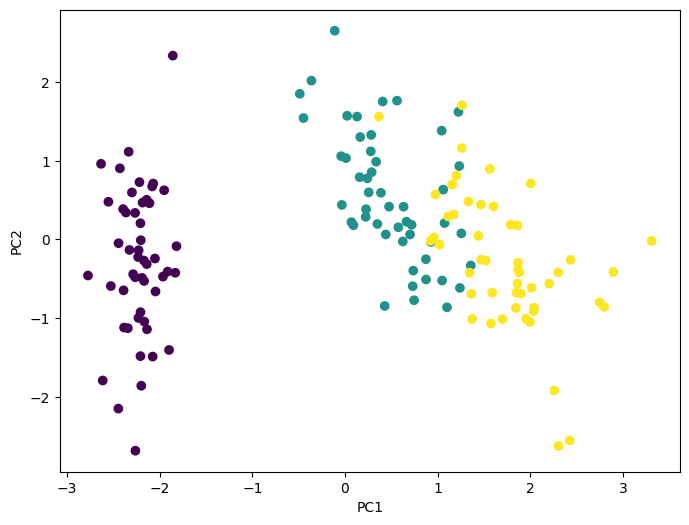

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로딩
iris = load_iris()

# 데이터프레임 생성
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 공분산 행렬 계산
covariance_matrix = np.cov(X_scaled.T)

# 고윳값, 고유벡터 계산
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# 고유값의 크기 순서대로 고유벡터 정렬
sorted_indices = eigen_values.argsort()[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# 주성분 개수 결정
total_variance = sum(eigen_values)
variance_explained_ratio = eigen_values / total_variance
cumulative_variance_explained_ratio = np.cumsum(variance_explained_ratio)

n_components = np.argmax(cumulative_variance_explained_ratio >= 0.9) + 1

# 주성분 분산과 분산비율 확인
principal_variances = eigen_values[:n_components]
principal_variances_ratio = variance_explained_ratio[:n_components]

print("주성분 분산: ", principal_variances)
print("주성분 분산 비율: ", principal_variances_ratio)

# 적당한 주성분 추출
principal_components = eigen_vectors[:, :n_components]
transformed_X = X_scaled.dot(principal_components)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

응용문제

In [24]:
from sklearn.datasets import load_boston
data=datasets.load_boston()
data

ImportError: ignored

In [ ]:
X_df=pd.DataFrame(data['data'],columns=data['feature_names'])
X_df.head()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# 3개의 주성분 추출
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

NameError: ignored